## Training Example

SSAI-3D supports sparse fine-tuning and inference on 3D microscopy data to achieve high-quality axial resolution restoration on a specific dataset. In this notebook, we provide two examples datasets for sparse fine-tuning.

#### Data Preparation

- For all usages, please prepare your data in a single tiff format, with shape `(depth, width, height)`.

- Move your single-stack 3D dataset to `~/SSAI-3D/demo`. For example, it can be [mouse brain neurons](https://drive.google.com/file/d/1p3CUWhaSJXAA_9k8p4nRrhjBmbegQ-vJ/view?usp=sharing) or [mouse liver](https://www.nature.com/articles/s41592-018-0216-7#data-availability).

#### Pre-trained Model Checkpoints

- Download the [pre-trained model](https://drive.google.com/file/d/14D4V4raNYIOhETfcuuLI3bGLB-OYIv6X/view) and place the file in ```~/SSAI-3D/demo/experiments/pretrained_models```.
  
- **[Optional]** For applications requiring denoising, put the denoising model under the same directory. For example, we have trained a [denoising model](https://drive.google.com/file/d/1Lkg5a8xtjze7cKitdMl8bIY38cLAIojT/view?usp=sharing) using self-owned data.


#### Preparations
import needed packages.

In [1]:
from basicsr.trainer import Surgeon, SurgeonTrainer
from basicsr.data import restore_volume, semi_synthetic_creation, \
     generate_raw_data, generate_zs_dataset, adjust_contrast, denoised_semi_synthetic_creation
from basicsr.model_train import trainer_train, restore
from easydict import EasyDict
import numpy as np 
import os

Load anisotropic raw stack, generated semi-synthetic dataset, as well as zero-shot dataset

In [2]:
raw_tif_pth, kernel_num, project_depth, data_pth = \
    './raw_data.tif', 3, 5, './demo_dataset'

In [3]:
semi_synthetic_creation(raw_tif_pth = raw_tif_pth, save_pth = data_pth, \
    kernel_num = kernel_num, project_depth = project_depth, downsample_rate = 5,  rotation = False)

generate_raw_data(raw_pth = raw_tif_pth, save_pth= data_pth, dr = 5)
generate_zs_dataset(data_pth)

uint16


Obtain zero-shot metrics as well as the relative performance of each layer within the network via a pre-trained surgeon network

In [4]:
configs = EasyDict({
    'model_path' : f'./experiments/pretrained_models/NAFNet-REDS-width64.pth',
    'lq_pth': os.path.join(data_pth, 'zs_lq'),
    'gt_pth': os.path.join(data_pth, 'zs_gt'),
    'lr': 1e-4
})
operation = Surgeon(configs)
operation.get_zeroshot_information()
surgeon_trainer = SurgeonTrainer()
elementwise_input = operation.input_dict.copy()
rank = surgeon_trainer.forward_all(elementwise_input)

Disable distributed.
none
rank: 0
ws: 1


/home/youlab/Desktop/workspace/jiashu/projects/SSAI-3D/basicsr/models/base_model.py:277: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_net = torch.load(
2024-10-26 12:2

 load net keys <built-in method keys of dict object at 0x7a92b1e200c0>
.. cosineannealingLR
grad_norm
snip
grasp
fisher


/home/youlab/anaconda3/envs/learned_uncertainty/lib/python3.9/site-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


plain
synflow


#### Training the network

In [5]:
trainer_train(rank, data_pth)

Disable distributed.


2024-10-26 12:23:21,543 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.2.0+154b7b3
	PyTorch: 2.5.0+cu118
	TorchVision: 0.20.0+cu118
2024-10-26 12:23:21,543 INFO: 
  name: demo_neurons
  model_type: ImageRestorationModel
  scale: 1
  num_gpu: 1
  manual_seed: 10
  datasets:[
    train:[
      name: reds-train
      type: PairedImageDataset
      dataroot_gt: ./demo_dataset/gt
      dataroot_lq: ./de

none


2024-10-26 12:23:22,577 INFO: Loading NAFNetLocal model from ./experiments/pretrained_models/NAFNet-REDS-width64.pth.
2024-10-26 12:23:22,774 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of dict object at 0x7a924b3d1280>
.. cosineannealingLR


2024-10-26 12:23:23,299 INFO: Start training from epoch: 0, iter: 0
2024-10-26 12:24:08,413 INFO: [demo_..][epoch:  0, iter:     200, lr:(9.055e-05,)] [eta: 0:03:01, time (data): 0.220 (0.002)] l_pix: -4.1215e+01 
2024-10-26 12:24:52,652 INFO: [demo_..][epoch:  0, iter:     400, lr:(6.563e-05,)] [eta: 0:02:14, time (data): 0.218 (0.002)] l_pix: -4.3247e+01 
2024-10-26 12:25:14,736 INFO: Saving models and training states.
2024-10-26 12:25:37,327 INFO: [demo_..][epoch:  0, iter:     600, lr:(3.476e-05,)] [eta: 0:01:29, time (data): 0.220 (0.002)] l_pix: -4.4216e+01 
2024-10-26 12:26:21,520 INFO: [demo_..][epoch:  1, iter:     800, lr:(9.732e-06,)] [eta: 0:00:44, time (data): 0.219 (0.002)] l_pix: -4.4899e+01 
2024-10-26 12:27:05,586 INFO: [demo_..][epoch:  1, iter:   1,000, lr:(1.002e-07,)] [eta: 0:00:00, time (data): 0.223 (0.002)] l_pix: -3.3104e+01 
2024-10-26 12:27:05,587 INFO: Saving models and training states.
2024-10-26 12:27:06,023 INFO: End of training. Time consumed: 0:03:42
20

#### Resolution Restoration

In [6]:
data_pth = './demo_dataset'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './results'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
# Currently set batch size to 1 to be compatible with smaller GPUs, can be adjusted as needed to speed up inference.
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')

Disable distributed.
none


2024-10-26 12:27:10,482 INFO: Loading NAFNetLocal model from ../experiments/demo_neurons/models/net_g_latest.pth.
2024-10-26 12:27:10,671 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x7a924b46ca40>


100%|██████████| 500/500 [00:28<00:00, 17.35it/s]

Disable distributed.


none


2024-10-26 12:27:40,350 INFO: Loading NAFNetLocal model from ../experiments/demo_neurons/models/net_g_latest.pth.
2024-10-26 12:27:40,543 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x7a924b1b20c0>


100%|██████████| 400/400 [00:29<00:00, 13.52it/s]


In [7]:
import tifffile
tmp = tifffile.imread('./raw_data.tif')
tmp.dtype.name

'uint16'

Average from XZ and YZ directions

In [8]:
xz, yz, av = restore_volume(in_pth_xz, out_pth_xz, out_pth_yz)

100%|██████████| 400/400 [00:00<00:00, 1834.88it/s]


#### Visualization

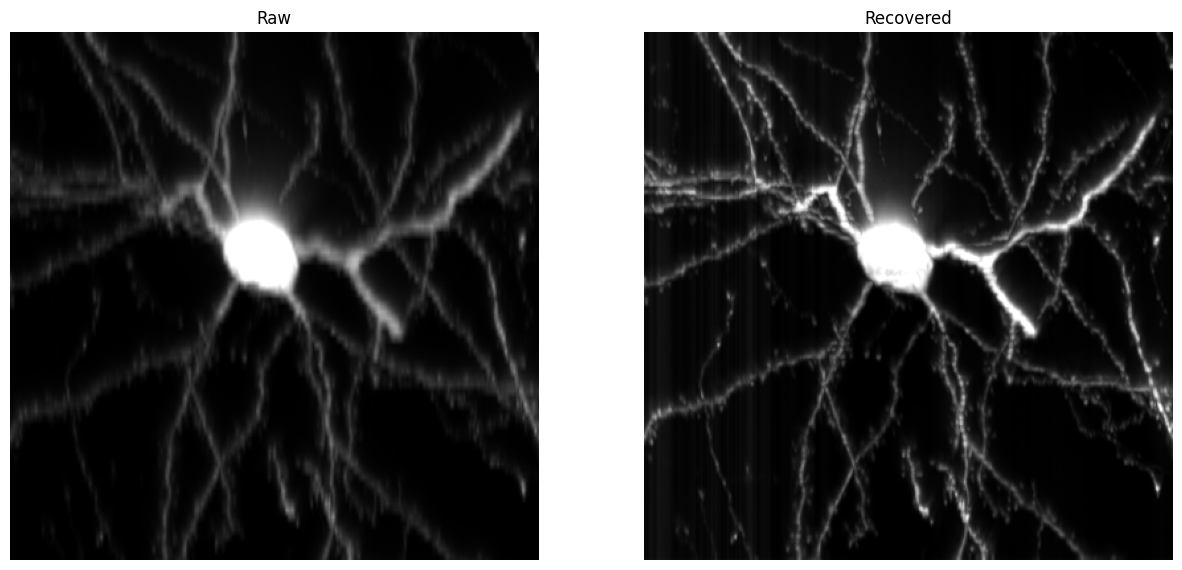

In [9]:
import tifffile
import numpy as np
import cv2
import matplotlib.pyplot as plt
raw_tif_pth = './raw_data.tif'
raw = tifffile.imread(raw_tif_pth)

slice_idx = 200
depth = 200
figs, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(adjust_contrast(cv2.resize(np.amax(raw[:, :, slice_idx:slice_idx + depth], -1), (1153, 194*5))[:400, :400]), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Raw')
axs[1].imshow(adjust_contrast(np.amax(av[slice_idx:slice_idx + depth], 0)[:400, :400]), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Recovered')
plt.show()


## Resolution Enhancement with Denoising

##### First create denoised semi-synthetic data

In [18]:
from basicsr.trainer import Surgeon, SurgeonTrainer
from basicsr.data import restore_volume, semi_synthetic_creation, \
     generate_raw_data, generate_zs_dataset, adjust_contrast, denoised_semi_synthetic_creation
from basicsr.model_train import trainer_train, restore
from easydict import EasyDict
import os
raw_tif_pth, kernel_num, project_depth, data_pth = \
    './raw_data.tif', 3, 5, './demo_dataset'

In [19]:
semi_synthetic_creation(raw_tif_pth = raw_tif_pth, save_pth = data_pth, \
    kernel_num = kernel_num, project_depth = project_depth, downsample_rate = 5,  rotation = False)

generate_raw_data(raw_pth = raw_tif_pth, save_pth= data_pth, dr = 5)
generate_zs_dataset(data_pth)


uint16


In [2]:
restore(input_pth='./demo_dataset/test_xy',output_pth='./demo_dataset/denoised_gt',model_pth= './experiments/pretrained_models/denoising_model.pth', denoise = True) 
denoised_semi_synthetic_creation(input_pth = './demo_dataset/denoised_gt',output_pth = './demo_dataset/',
    kernel_num = 3, downsample_rate = 5,  rotation = False)

Disable distributed.
none
 load net keys <built-in method keys of collections.OrderedDict object at 0x7f91cf91bcc0>


Current net - loaded net:
  ending.bias
  ending.weight
Loaded net - current net:
  ending.lower.bias
  ending.lower.weight
  ending.prediction.bias
  ending.prediction.weight
  ending.upper.bias
  ending.upper.weight
Size different, ignore [intro.weight]: crt_net: torch.Size([64, 3, 3, 3]); load_net: torch.Size([64, 5, 3, 3])
2024-09-20 17:03:44,522 INFO: Model [ImageRestorationModel] is created.
100%|██████████| 80/80 [00:09<00:00,  8.84it/s]


In [ ]:
trainer_train(rank, './demo_dataset/denoised_gt_train', './demo_dataset/denoised_lq_train')

In [ ]:
data_pth = './demo_dataset'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './demo_dataset/denoised_results'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
# Currently set batch size to 1 to be compatible with smaller GPUs, can be adjusted as needed to speed up inference.
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth = './experiments/pretrained_models/denoising_model.pth', denoise = True)
        # './experiments/pretrained_models/denoising_model.pth', denoise = True)

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  './experiments/pretrained_models/denoising_model.pth', denoise = True)


data_pth = './demo_dataset/denoised_results'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './results/deconved_denoised_results'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')


In [3]:
xz, yz, av = restore_volume(in_pth_xz, out_pth_xz, out_pth_yz)

100%|██████████| 400/400 [00:04<00:00, 95.85it/s] 


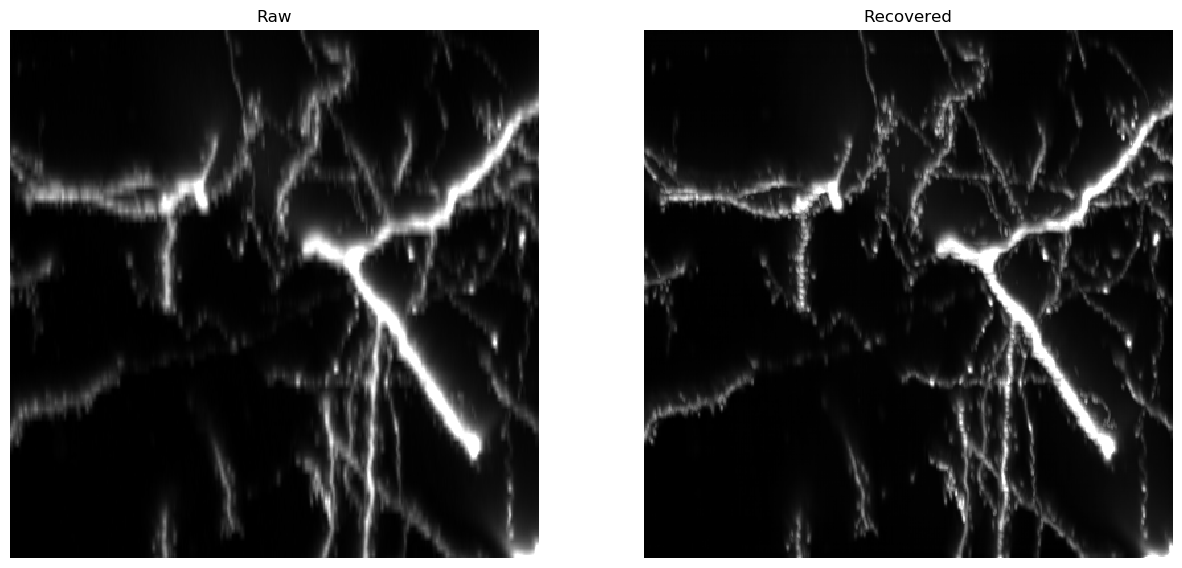

In [13]:
import tifffile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
raw_tif_pth = './raw_data.tif'
raw = tifffile.imread(raw_tif_pth)

slice_idx = 100
depth = 200
figs, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(adjust_contrast(cv2.resize(np.amax(raw[:, :, slice_idx:slice_idx + depth], -1), (1153, 194*5))[:400, :400]), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Raw')
axs[1].imshow(adjust_contrast(np.amax(av[slice_idx:slice_idx + depth], 0)[:400, :400]), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Recovered')
plt.show()